In [21]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# Load the dataset

diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

In [23]:
# Data Description

print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [24]:
# Questions
# Q1.a) Generate last 3 rows of dataset

print(df.tail(3))

          age       sex       bmi        bp        s1        s2        s3  \
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
439 -0.011080 -0.046883  0.015491   132.0  
440  0.026560  0.044529 -0.025930   220.0  
441 -0.039493 -0.004222  0.003064    57.0  


In [25]:
# Q1.b) Print First, second, and last row in the Dataframe

print(df.iloc[[0, 1, -1]])

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
0   -0.002592  0.019907 -0.017646   151.0  
1   -0.039493 -0.068332 -0.092204    75.0  
441 -0.039493 -0.004222  0.003064    57.0  


In [26]:
# Q1.c) Print the 2 rows just before the last 3 rows in the Dataframe

print(df.iloc[-5:-3])

          age      sex       bmi        bp        s1        s2        s3  \
437  0.041708  0.05068  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.05068 -0.015906 -0.067642  0.049341  0.079165 -0.028674   

           s4        s5        s6  target  
437 -0.002592  0.031193  0.007207   178.0  
438  0.034309 -0.018114  0.044485   104.0  


In [27]:
# Q1.d) Summarize the data as an analyst
print(df.describe())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

In [28]:
# Q2) Subset the above Dataframe for age > 35
# Note: The age variable in the diabetes dataset is standardized, so we assume you mean the top 50% of ages.

age_threshold = np.percentile(df['age'], 50)
subset_df = df[df['age'] > age_threshold]
print(subset_df)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
7    0.063504  0.050680 -0.001895  0.066629  0.090620  0.108914  0.022869   
8    0.041708  0.050680  0.061696 -0.040099 -0.013953  0.006202 -0.028674   
11   0.027178  0.050680  0.017506 -0.033213 -0.007073  0.045972 -0.065491   
..        ...       ...       ...       ...       ...       ...       ...   
431  0.070769  0.050680 -0.030996  0.021872 -0.037344 -0.047034  0.033914   
432  0.009016 -0.044642  0.055229 -0.005670  0.057597  0.044719 -0.002903   
434  0.016281 -0.044642  0.001339  0.008101  0.005311  0.010899  0.030232   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   

           s4        s5        s6  target  
0   -0.002592  0.019907 -0.0176

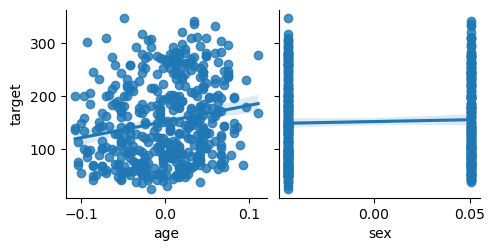

In [29]:
# Q3) Find the relationship between Age, Sex, and Target Variable

sns.pairplot(df, x_vars=['age', 'sex'], y_vars='target', kind='reg')
plt.show()

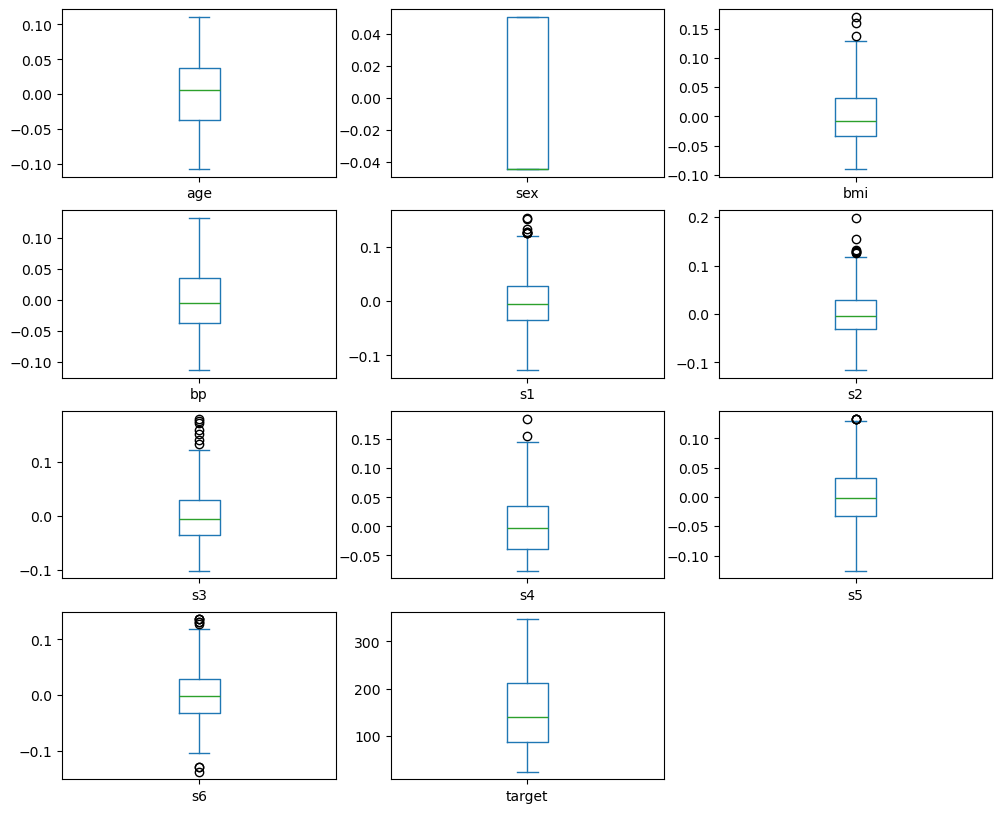

In [30]:
# Q4) Generate Box plot to detect outliers

df.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(12,10))
plt.show()

In [31]:
# Q5) Split the dataset into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Q6) Train the Model using training dataset

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
# Q7) Generate Predictions using Test dataset
predictions = model.predict(X_test)
print(predictions)

[139.5475584  179.51720835 134.03875572 291.41702925 123.78965872
  92.1723465  258.23238899 181.33732057  90.22411311 108.63375858
  94.13865744 168.43486358  53.5047888  206.63081659 100.12925869
 130.66657085 219.53071499 250.7803234  196.3688346  218.57511815
 207.35050182  88.48340941  70.43285917 188.95914235 154.8868162
 159.36170122 188.31263363 180.39094033  47.99046561 108.97453871
 174.77897633  86.36406656 132.95761215 184.53819483 173.83220911
 190.35858492 124.4156176  119.65110656 147.95168682  59.05405241
  71.62331856 107.68284704 165.45365458 155.00975931 171.04799096
  61.45761356  71.66672581 114.96732206  51.57975523 167.57599528
 152.52291955  62.95568515 103.49741722 109.20751489 175.64118426
 154.60296242  94.41704366 210.74209145 120.2566205   77.61585399
 187.93203995 206.49337474 140.63167076 105.59678023 130.70432536
 202.18534537 171.13039501 164.91423047 124.72472569 144.81030894
 181.99635452 199.41369642 234.21436188 145.95665512  79.86703276
 157.369412

In [34]:
# Q8) Calculate MSE for the predictions
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2900.1936284934804


In [35]:
# Q9.a) Can you evaluate your models?
r2_score = model.score(X_test, y_test)
print(f'R^2 Score: {r2_score}')

R^2 Score: 0.4526027629719196


In [36]:
# Q10) String based questions

text = 'India is fighting the Covid19 pandemic'

# Q10.a) Count the number of alphabets in the given phrase.
num_alphabets = sum(c.isalpha() for c in text)
print(f'Number of alphabets: {num_alphabets}')

# Q10.b) Count the number of words in the above phrase.
num_words = len(text.split())
print(f'Number of words: {num_words}')


Number of alphabets: 31
Number of words: 6
